In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('electricity_bill_dataset.csv')

In [3]:
df.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23,2,6,1,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22,2,3,1,0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20,2,6,7,0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22,3,21,1,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23,2,11,1,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4


In [4]:
df.tail()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
45340,18,22,3,22,1,0,9,Ahmedabad,Maha Transco – Maharashtra State Electricity T...,764,7.9,6035.6
45341,23,23,2,6,12,0,2,New Delhi,Orient Green,572,8.5,4862.0
45342,22,22,2,20,1,0,1,New Delhi,GE T&D India Limited,609,8.5,5176.5
45343,8,21,2,22,7,0,12,Ratnagiri,TransRail Lighting,748,7.4,5535.2
45344,8,17,2,4,1,0,1,Gurgaon,L&T Transmission & Distribution,427,8.3,3544.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fan              45345 non-null  int64  
 1   Refrigerator     45345 non-null  int64  
 2   AirConditioner   45345 non-null  int64  
 3   Television       45345 non-null  int64  
 4   Monitor          45345 non-null  int64  
 5   MotorPump        45345 non-null  int64  
 6   Month            45345 non-null  int64  
 7   City             45345 non-null  object 
 8   Company          45345 non-null  object 
 9   MonthlyHours     45345 non-null  int64  
 10  TariffRate       45345 non-null  float64
 11  ElectricityBill  45345 non-null  float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.2+ MB


In [6]:
df.isna().sum()

Fan                0
Refrigerator       0
AirConditioner     0
Television         0
Monitor            0
MotorPump          0
Month              0
City               0
Company            0
MonthlyHours       0
TariffRate         0
ElectricityBill    0
dtype: int64

In [7]:
df['City'].value_counts

<bound method IndexOpsMixin.value_counts of 0        Hyderabad
1         Vadodara
2           Shimla
3           Mumbai
4           Mumbai
           ...    
45340    Ahmedabad
45341    New Delhi
45342    New Delhi
45343    Ratnagiri
45344      Gurgaon
Name: City, Length: 45345, dtype: object>

In [8]:
df['City'].unique()

array(['Hyderabad', 'Vadodara', 'Shimla', 'Mumbai', 'Ratnagiri',
       'New Delhi', 'Dahej', 'Ahmedabad', 'Noida', 'Nagpur', 'Chennai',
       'Faridabad', 'Kolkata', 'Pune', 'Gurgaon', 'Navi Mumbai'],
      dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder
le_city=LabelEncoder()
le_company=LabelEncoder()

In [10]:
df['City']=le_city.fit_transform(df['City'])
df['Company']=le_company.fit_transform(df['Company'])

In [11]:
df.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23,2,6,1,0,10,5,27,384,8.4,3225.6
1,19,22,2,3,1,0,5,15,13,488,7.8,3806.4
2,7,20,2,6,7,0,7,14,8,416,7.7,3203.2
3,7,22,3,21,1,0,6,7,19,475,9.2,4370.0
4,11,23,2,11,1,0,2,7,20,457,9.2,4204.4


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fan              45345 non-null  int64  
 1   Refrigerator     45345 non-null  int64  
 2   AirConditioner   45345 non-null  int64  
 3   Television       45345 non-null  int64  
 4   Monitor          45345 non-null  int64  
 5   MotorPump        45345 non-null  int64  
 6   Month            45345 non-null  int64  
 7   City             45345 non-null  int32  
 8   Company          45345 non-null  int32  
 9   MonthlyHours     45345 non-null  int64  
 10  TariffRate       45345 non-null  float64
 11  ElectricityBill  45345 non-null  float64
dtypes: float64(2), int32(2), int64(8)
memory usage: 3.8 MB


In [13]:
df.corr()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
Fan,1.000000,0.563139,0.003201,0.005547,0.098622,NaN,-0.000672,0.005350,0.000999,0.426497,0.009861,0.410682
Refrigerator,0.563139,1.000000,0.010282,0.003906,0.085030,NaN,-0.002973,-0.001921,0.001971,0.392823,0.002510,0.376816
AirConditioner,0.003201,0.010282,1.000000,-0.007846,-0.008240,NaN,0.004880,0.004487,0.004119,0.273721,0.000116,0.261845
Television,0.005547,0.003906,-0.007846,1.000000,-0.000930,NaN,0.004757,0.002586,0.001550,0.429737,0.008486,0.412651
Monitor,0.098622,0.085030,-0.008240,-0.000930,1.000000,NaN,-0.002397,-0.003502,0.001347,0.324485,-0.001447,0.309986
MotorPump,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,-0.000672,-0.002973,0.004880,0.004757,-0.002397,NaN,1.000000,-0.005878,-0.001192,0.037002,0.003666,0.036316
City,0.005350,-0.001921,0.004487,0.002586,-0.003502,NaN,-0.005878,1.000000,0.001695,0.002711,-0.085953,-0.021603
Company,0.000999,0.001971,0.004119,0.001550,0.001347,NaN,-0.001192,0.001695,1.000000,-0.001291,0.010067,0.001670
MonthlyHours,0.426497,0.392823,0.273721,0.429737,0.324485,NaN,0.037002,0.002711,-0.001291,1.000000,0.009980,0.958702


<AxesSubplot:>

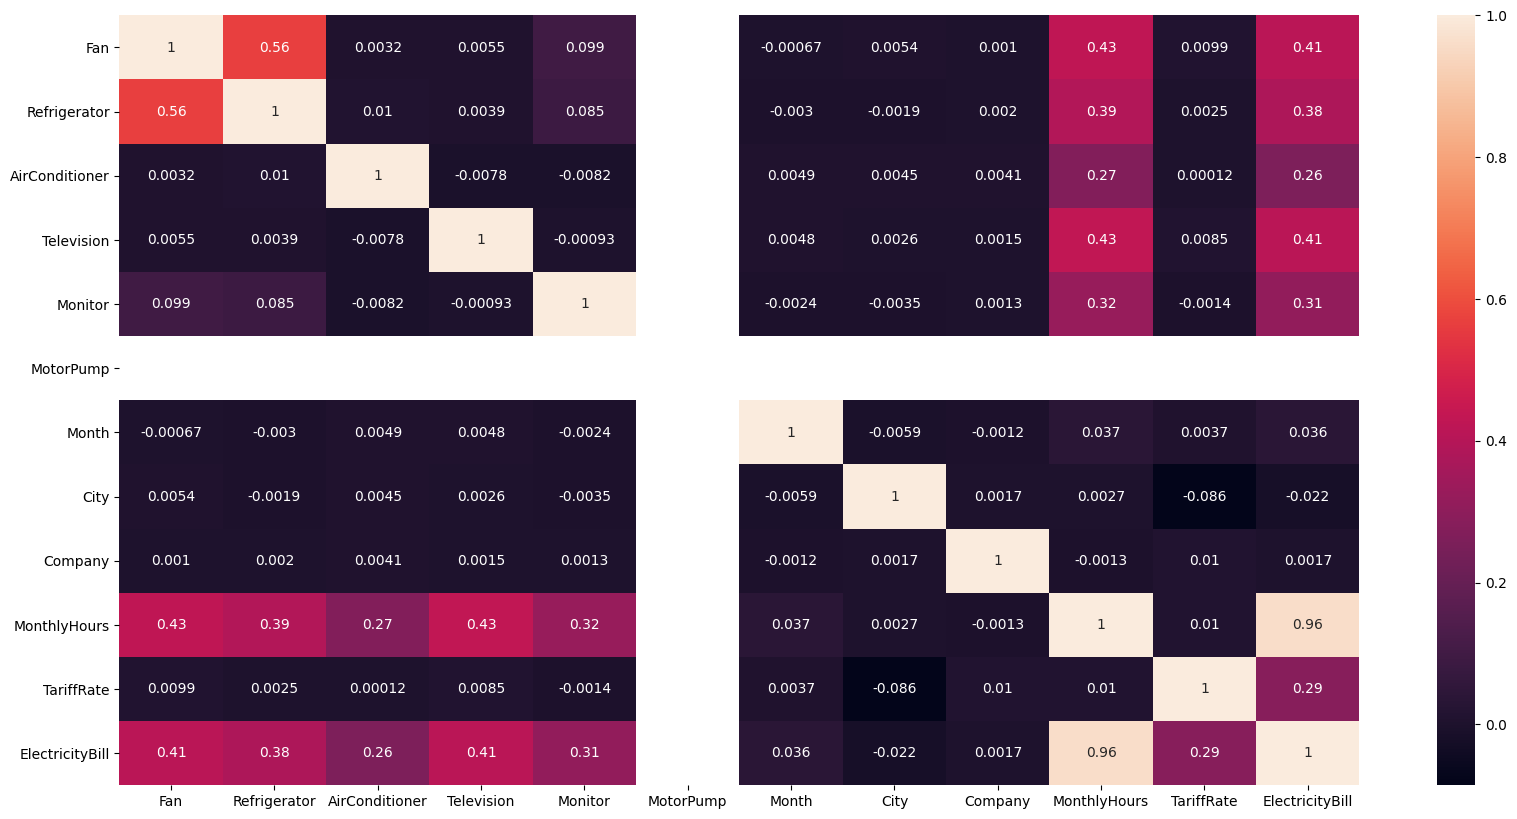

In [14]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(),annot=True)

In [15]:
df.drop('MotorPump',axis=1,inplace=True)


In [16]:
df.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23,2,6,1,10,5,27,384,8.4,3225.6
1,19,22,2,3,1,5,15,13,488,7.8,3806.4
2,7,20,2,6,7,7,14,8,416,7.7,3203.2
3,7,22,3,21,1,6,7,19,475,9.2,4370.0
4,11,23,2,11,1,2,7,20,457,9.2,4204.4


<AxesSubplot:>

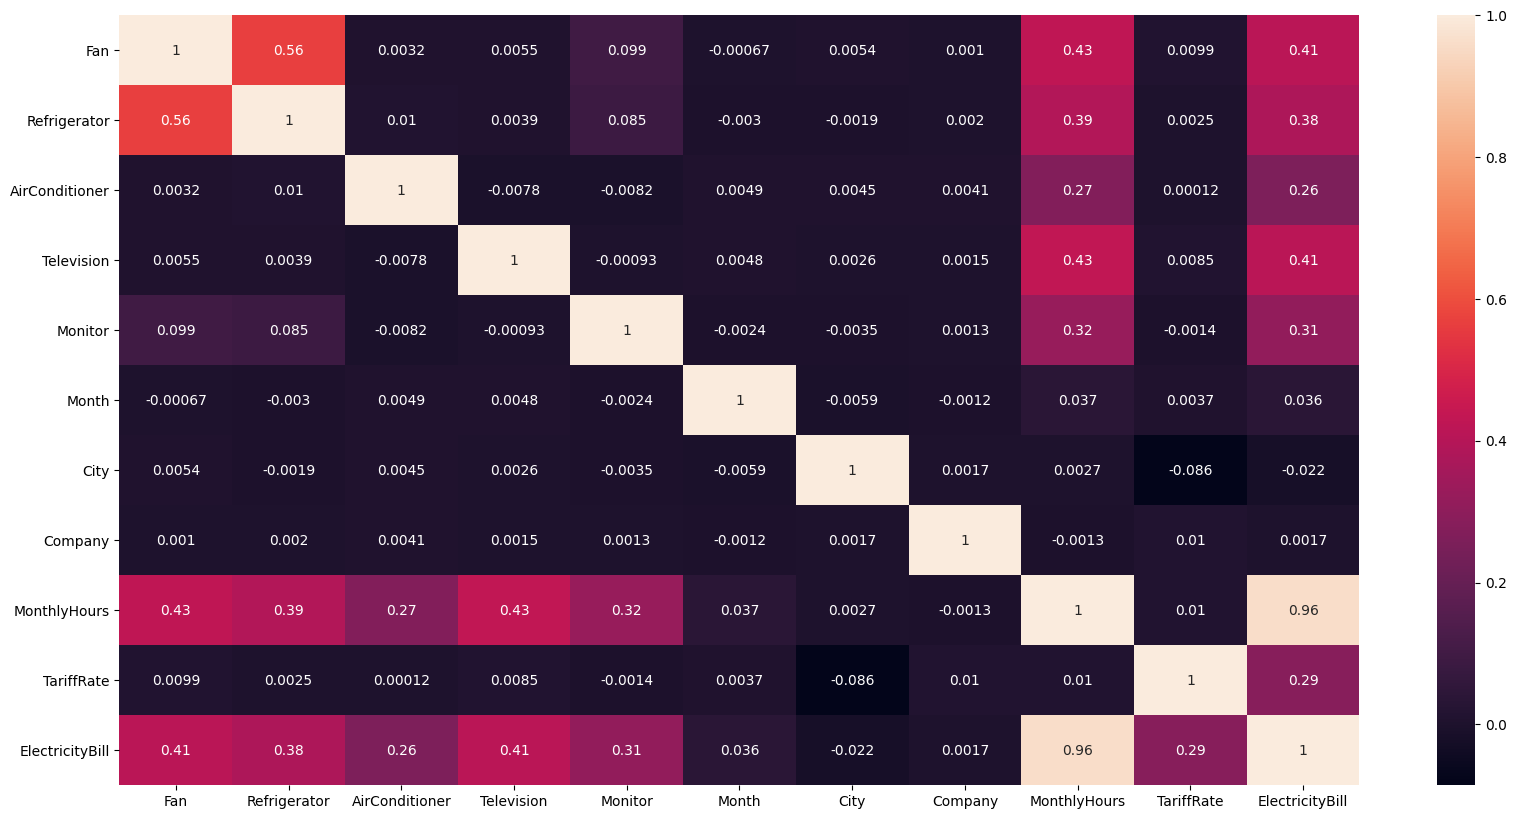

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [18]:
x=df.drop('ElectricityBill',axis=True)
y=df['ElectricityBill']

In [19]:
x.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,Month,City,Company,MonthlyHours,TariffRate
0,16,23,2,6,1,10,5,27,384,8.4
1,19,22,2,3,1,5,15,13,488,7.8
2,7,20,2,6,7,7,14,8,416,7.7
3,7,22,3,21,1,6,7,19,475,9.2
4,11,23,2,11,1,2,7,20,457,9.2


In [20]:
y.head()

0    3225.6
1    3806.4
2    3203.2
3    4370.0
4    4204.4
Name: ElectricityBill, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=33)

In [22]:
x_test.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,Month,City,Company,MonthlyHours,TariffRate
18164,8,23,1,15,1,7,10,9,491,8.5
28510,14,23,2,20,1,4,7,31,622,9.2
13022,12,22,1,18,1,2,5,31,601,8.4
9269,21,23,3,15,1,5,7,29,522,9.2
24415,15,23,2,17,1,4,10,22,571,8.5


In [23]:
x_train.reset_index(drop=True,inplace=True)
x_test.reset_index(drop=True,inplace=True)

In [24]:
x_test.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,Month,City,Company,MonthlyHours,TariffRate
0,8,23,1,15,1,7,10,9,491,8.5
1,14,23,2,20,1,4,7,31,622,9.2
2,12,22,1,18,1,2,5,31,601,8.4
3,21,23,3,15,1,5,7,29,522,9.2
4,15,23,2,17,1,4,10,22,571,8.5


In [25]:
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(9069, 10)
(36276, 10)
(9069,)
(36276,)


In [26]:
cols=list(x.columns)
cols

['Fan',
 'Refrigerator',
 'AirConditioner',
 'Television',
 'Monitor',
 'Month',
 'City',
 'Company',
 'MonthlyHours',
 'TariffRate']

In [27]:
for i in cols:
    print(i)
    print(np.min(x_train[i]))
    print(np.max(x_train[i]))

Fan
5
23
Refrigerator
17
23
AirConditioner
0
3
Television
3
22
Monitor
1
12
Month
1
12
City
0
15
Company
0
31
MonthlyHours
95
926
TariffRate
7.4
9.3


In [28]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train.loc[:,"MonthlyHours"]=scalar.fit_transform(x_train['MonthlyHours'].values.reshape(-1,1))
x_test.loc[:,"MonthlyHours"]=scalar.fit_transform(x_test['MonthlyHours'].values.reshape(-1,1))

c:\Users\A Keerthi Reddy\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
c:\Users\A Keerthi Reddy\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [29]:
x_test.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,Month,City,Company,MonthlyHours,TariffRate
0,8,23,1,15,1,7,10,9,-0.191862,8.5
1,14,23,2,20,1,4,7,31,0.870197,9.2
2,12,22,1,18,1,2,5,31,0.699943,8.4
3,21,23,3,15,1,5,7,29,0.059465,9.2
4,15,23,2,17,1,4,10,22,0.456724,8.5


In [30]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [31]:
models=[LinearRegression,Ridge,Lasso,DecisionTreeRegressor,RandomForestRegressor]
print_vals=[]
for i in models:
    mod=i()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    r2=r2_score(y_test,y_pred)
    print_vals.append({'Model':i.__name__,'r2_score':r2})
print(pd.DataFrame(print_vals))

                   Model  r2_score
0       LinearRegression  0.995544
1                  Ridge  0.995544
2                  Lasso  0.995528
3  DecisionTreeRegressor  0.999786
4  RandomForestRegressor  0.999897


In [32]:
lin=LinearRegression()
lin.fit(x_train,y_train)

LinearRegression()

In [33]:
y_prd=lin.predict(x_test)
y_prd


array([4182.5510441 , 5632.73756811, 5046.26384142, ..., 3267.34460881,
       3884.1787745 , 2700.7146159 ])

In [34]:
r2_score(y_test,y_prd)

0.9955440599923925

In [35]:
import pickle
pickle.dump(le_city,open('le_city.pkl','wb'))
pickle.dump(le_company,open('le_company.pkl','wb'))
pickle.dump(scalar,open('scalar.pkl','wb'))
pickle.dump(lin,open('lin.pkl','wb'))